In [1]:
import torch.optim as optim
import torchvision.transforms as transforms
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

class DroneDataset(Dataset):

    def __init__(self, img_path, mask_path, transform=None):
        self.img_path = img_path
        self.mask_path = mask_path

        self.transform = transform

        self.all_img_paths = []
        self.all_mask_paths = []

        img_files = os.walk(self.img_path).__next__()[2]
        for img_file in img_files:
            img_file = os.path.join(self.img_path, img_file)
            self.all_img_paths.append(img_file)
 
        mask_files = os.walk(self.mask_path).__next__()[2]
        for mask_file in mask_files:
            mask_file = os.path.join(self.mask_path, mask_file)
            self.all_mask_paths.append(mask_file)


    def __len__(self):
        return len(self.all_img_paths)

    def __getitem__(self, idx):

        img = Image.open(self.all_img_paths[idx])
        mask = Image.open(self.all_mask_paths[idx])

        img = img.convert("RGB")
        mask = mask.convert("L")

        if self.transform is None:
            img = Image.fromarray(img)
            mask = Image.fromarray(mask)
        else:
            img = self.transform(img)
            mask = self.transform(mask)

        return img, mask


# Define the U-Net architecture for segmentation
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, out_channels, kernel_size=2, stride=2)
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)
        return x2


# Set device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations and create dataset loader
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

IMAGE_PATH = 'semantic_drone_dataset/original_images'
MASK_PATH = 'semantic_drone_dataset/label_images_semantic'

dataset = DroneDataset(IMAGE_PATH, MASK_PATH, transform)

# dataset = ImageFolder(root='./semantic_drone_dataset', transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Define the model, loss function, and optimizer
model = UNet(in_channels=3, out_channels=1).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(dataset)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Save the trained model
torch.save(model.state_dict(), 'segmentation_model.pth')

c:\Users\kimju\anaconda3\envs\AI-py37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
IMAGE_PATH = 'semantic_drone_dataset/original_images'
all_img_paths=[]


img_files = os.walk(IMAGE_PATH).__next__()[2]
img_files

for img_file in img_files:
    img_file = os.path.join(IMAGE_PATH, img_file)
    all_img_paths.append(img_file)

all_img_paths

['000.jpg',
 '001.jpg',
 '002.jpg',
 '003.jpg',
 '004.jpg',
 '005.jpg',
 '006.jpg',
 '008.jpg',
 '011.jpg',
 '013.jpg',
 '014.jpg',
 '015.jpg',
 '016.jpg',
 '018.jpg',
 '019.jpg',
 '021.jpg',
 '022.jpg',
 '023.jpg',
 '026.jpg',
 '028.jpg',
 '031.jpg',
 '035.jpg',
 '038.jpg',
 '040.jpg',
 '041.jpg',
 '042.jpg',
 '043.jpg',
 '044.jpg',
 '045.jpg',
 '047.jpg',
 '049.jpg',
 '051.jpg',
 '052.jpg',
 '053.jpg',
 '055.jpg',
 '056.jpg',
 '057.jpg',
 '058.jpg',
 '059.jpg',
 '060.jpg',
 '062.jpg',
 '063.jpg',
 '065.jpg',
 '068.jpg',
 '070.jpg',
 '071.jpg',
 '073.jpg',
 '074.jpg',
 '075.jpg',
 '077.jpg',
 '078.jpg',
 '079.jpg',
 '080.jpg']

In [ ]:
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os


class DroneDataset(Dataset):

    def __init__(self, img_path, mask_path, transform=None):
        self.img_path = img_path
        self.mask_path = mask_path

        self.transform = transform


        self.all_img_paths = []
        self.all_mask_paths = []

        img_files = os.walk(self.img_path).__next__()[2]

        for img_file in img_files:
            img_file = os.path.join(self.img_path, img_file)
            self.all_img_paths.append(img_file)

        mask_files = os.walk(self.mask_path).__next__()[2]
        for mask_file in mask_files:
            mask_file = os.path.join(self.mask_path, mask_file)
            self.all_mask_paths.append(mask_file)


    def __len__(self):
        return len(self.all_img_paths)

    def __getitem__(self, idx):

        img = Image.open(self.all_img_paths[idx])
        mask = Image.open(self.all_mask_paths[idx])

        img = img.convert("RGB")
        mask = mask.convert("L")

        if self.transform is None:
            img = Image.fromarray(img)
            mask = Image.fromarray(mask)
        else:
            img = self.transform(img)
            mask = self.transform(mask)



        return img, mask



# Define the U-Net architecture for segmentation
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, out_channels, kernel_size=2, stride=2)
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)
        return x2


# Set device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations and create dataset loader
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

IMAGE_PATH = './semantic_drone_dataset/original_images'
MASK_PATH = './semantic_drone_dataset/label_images_semantic'

dataset = DroneDataset(IMAGE_PATH, MASK_PATH, transform)

# dataset = ImageFolder(root='./semantic_drone_dataset', transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Define the model, loss function, and optimizer
model = UNet(in_channels=3, out_channels=1).to(device)
model.load_state_dict(torch.load("segmentation_model.pth"))

model.eval()
running_loss = 0.0
with torch.no_grad():
    for inputs, labels in tqdm(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)


        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        ax1.imshow(inputs[0].permute(1,2,0).detach().numpy())
        ax1.set_title('Picture')

        ax2.imshow(labels[0].permute(1,2,0).detach().numpy())
        ax2.set_title('Ground truth')
        ax2.set_axis_off()

        ax3.imshow(outputs[0].permute(1,2,0).detach().numpy())
        ax3.set_title('Simple-segmentation')
        ax3.set_axis_off()

        plt.show()
        plt.close()

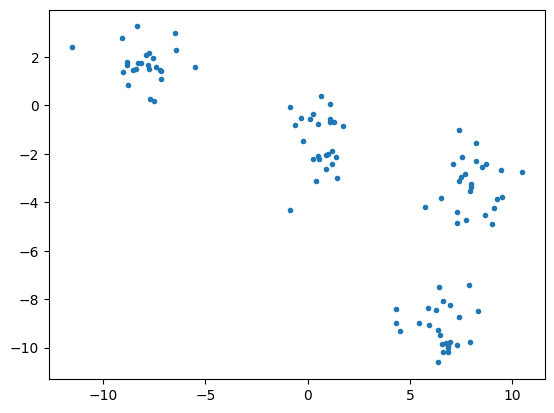

          x1        x2
0   0.276181 -2.217047
1   7.927368 -9.761527
2   8.491428 -2.549749
3 -11.537102  2.434883
4   4.292259 -8.992204
5   0.911433 -2.638517
6   7.298851 -9.905640
7   0.516622 -0.751186
8  -7.731942  1.506037
9   1.208242 -1.893695


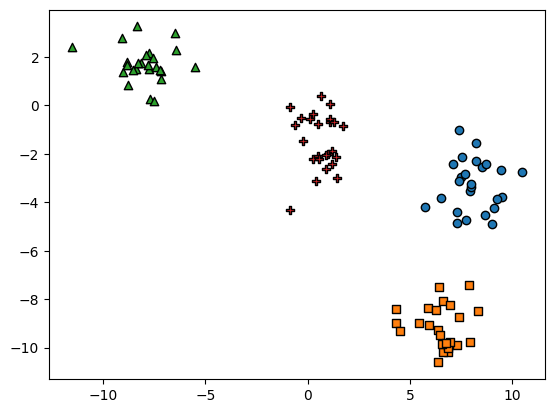

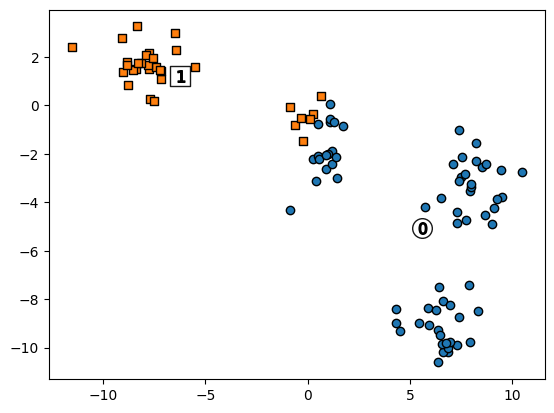

target  kmeans_label
0       0               25
1       0               25
2       1               25
3       0               18
        1                7
Name: kmeans_label, dtype: int64


In [15]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

x, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=6)
plt.scatter(x[:,0], x[:, 1], marker='.')
plt.show()

points = pd.DataFrame(x, y).reset_index(drop=True)
points.columns = ["x1", "x2"]
points.head()
print(points.head(n=10))

points['target'] = y

target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들.
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = points[points['target']==target]
    plt.scatter(x=target_cluster['x1'], y=target_cluster['x2'], edgecolor='k', marker=markers[target] )

plt.show()

# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, random_state=2, n_init=1)
cluster_labels = kmeans.fit_predict(x)
points['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = points[points['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['x1'], y=label_cluster['x2'], edgecolor='k',
                marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()

print(points.groupby('target')['kmeans_label'].value_counts())

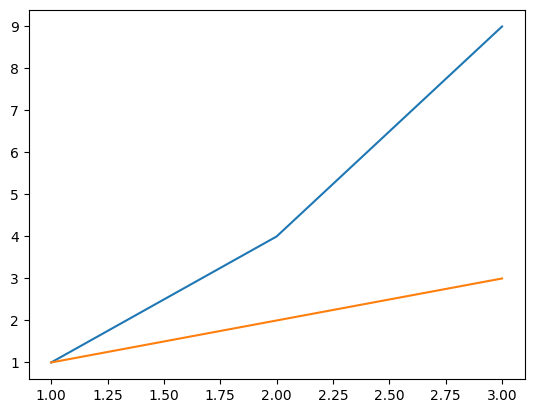

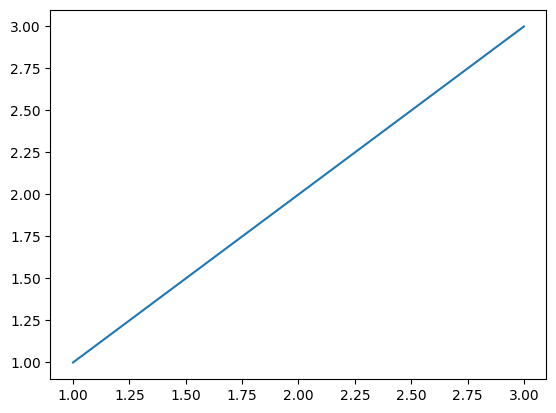

In [9]:
##################################################
plt.plot([1, 2, 3], [1, 4 ,9])
plt.plot([1, 2 ,3], [1 ,2 ,3])
plt.show()
plt.plot([1, 2, 3], [1, 2, 3])
plt.show()
##################################################

In [14]:
x[:,1]

array([ -2.21704726,  -9.7615272 ,  -2.54974889,   2.43488287,
        -8.99220442,  -2.63851693,  -9.90563956,  -0.75118594,
         1.50603664,  -1.89369549,  -4.72901672,   1.10479304,
         0.05307861,   1.37286811,  -1.02379608,   0.82821393,
        -1.54781358, -10.18071547,  -2.28672255,   3.00069462,
        -2.41730491,  -9.25691447,  -2.07241713,  -4.84225716,
        -2.96403632,   1.59157872,  -8.99900075,  -8.07144707,
        -0.04974727,  -3.11024352,  -4.87449712,   1.42866565,
        -2.428817  ,  -8.37284513,  -4.19481136,   1.52713041,
       -10.20150177,  -8.43925752,  -1.99722822,  -4.33078222,
        -3.51553205,  -0.35774806,   2.28574933,   3.26397914,
         1.68145403,  -7.50322463,  -1.48513774,  -2.75858164,
         1.45314624,   0.26842069,  -9.05353781,  -7.41655113,
        -8.7241701 ,  -9.92422452,  -8.47191434,  -3.38236058,
        -2.12266605,   2.17130787,  -2.19233972,  -4.39392379,
        -4.21790533,  -0.82974817,  -2.6476988 ,  -2.11

In [12]:
a=(1, 2)
print(type(a))

a=complex(1, 1)
print(type(a))

## 출력: <class 'tuple'> <class 'complex'>
##위와 같은 방법으로 객체 타입인지 확인 가능

<class 'tuple'>
<class 'complex'>


In [13]:
a

(1+1j)

In [3]:
i=0.1

for i in range(1, 10):
    print(i)

1
2
3
4
5
6
7
8
9
